# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
#from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from numpy import expand_dims
#from keras.preprocessing.image import load_img
from keras.utils import load_img
#from keras.preprocessing.image import img_to_array
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils import ImageDataGenerator

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape

import random
from PIL import Image
import scipy.io
from pathlib import Path
import matplotlib.pyplot as plt
import os



!pip3 install kaggle
!kaggle datasets download -d landrykezebou/vcor-vehicle-color-recognition-dataset
!unzip vcor-vehicle-color-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/orange/e4f9205ccc.jpg  
  inflating: train/orange/e532c363be.jpg  
  inflating: train/orange/e5d2677717.jpg  
  inflating: train/orange/e6bbd5bd7c.jpg  
  inflating: train/orange/e6c8c2eb92.jpg  
  inflating: train/orange/e734cc9748.jpg  
  inflating: train/orange/e75ad9cbe4.jpg  
  inflating: train/orange/e7793a0aef.jpg  
  inflating: train/orange/e8005c8ac5.jpg  
  inflating: train/orange/e85a7f559d.jpg  
  inflating: train/orange/e865d8da86.jpg  
  inflating: train/orange/e8fd7563ed.jpg  
  inflating: train/orange/ea48d0930b.jpg  
  inflating: train/orange/ea71c13a20.jpg  
  inflating: train/orange/ea75ce4328.jpg  
  inflating: train/orange/eacc03787d.jpg  
  inflating: train/orange/eae2b8608d.jpg  
  inflating: train/orange/eb25a96e49.jpg  
  inflating: train/orange/eb704000fa.jpg  
  inflating: train/orange/ebd0009374.jpg  
  inflating: train/orange/ef030538af.jpg  
  inflating: train/orange/ef6959e880.jpg  
  i

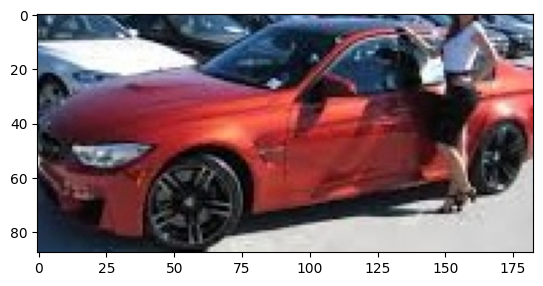

In [ ]:
os.getcwd()
img = '/content/train/orange/ffb2e78e31.jpg'
img = plt.imread(img)
plt.imshow(img)


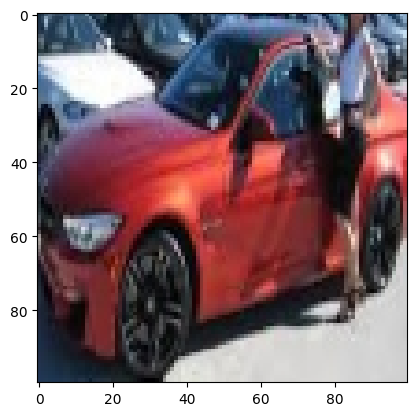

In [ ]:
image = cv2.imread('/content/train/orange/ffb2e78e31.jpg')

# Convert BGR image to RGB
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize the image to a standard size using interpolation
target_size = (100, 100)  # Adjust the size as needed
resized_image = cv2.resize(rgb_image, target_size, interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_image)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle

# Set up paths
data_dir = 'train/'
colors = [folder for folder in os.listdir(data_dir)]

# Initialize lists
images = []
labels = []

# Iterate through folders and resize images



# 0-15, rred, black, blue
for label, color in enumerate(colors):
    color_path = os.path.join(data_dir, color)
    for image_filename in os.listdir(color_path):
        image_path = os.path.join(color_path, image_filename)
        image = cv2.imread(image_path)

        # Convert BGR image to RGB
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize the image to a standard size using interpolation
        target_size = (100, 100)  # Adjust the size as needed
        resized_image = cv2.resize(rgb_image, target_size, interpolation=cv2.INTER_LINEAR)

        images.append(resized_image)
        labels.append(label)

# Convert lists to arrays
train_images = np.array(images)
train_labels = np.array(labels)

# Print the shapes of arrays (optional)
print("Images shape:", train_images.shape)
print("Labels shape:", train_labels.shape)


Images shape: (7267, 100, 100, 3)
Labels shape: (7267,)


[ 0  0  0 ... 14 14 14]


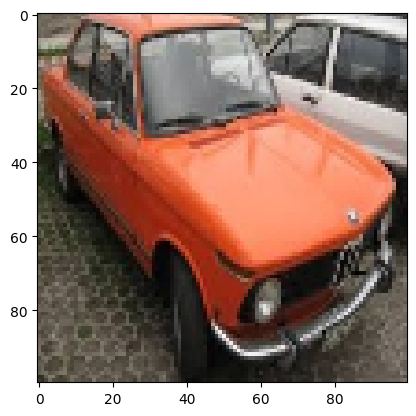

In [ ]:
print(train_labels)
plt.imshow(train_images[100])

In [ ]:
print(pd.Series(train_labels).value_counts())

9     742
2     637
6     577
12    565
11    563
7     536
13    534
8     483
14    428
10    421
3     406
0     403
1     400
4     362
5     210
dtype: int64


In [ ]:
# Set up paths
data_dir = 'test/'
colors = [folder for folder in os.listdir(data_dir)]
print(colors)


# Initialize lists
test_images = []
test_labels = []

# Iterate through folders and resize images
for label, color in enumerate(colors):
    color_path = os.path.join(data_dir, color)

    for image_filename in os.listdir(color_path):
        image_path = os.path.join(color_path, image_filename)
        image = cv2.imread(image_path)

        # Convert BGR image to RGB
        rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resize the image to a standard size using interpolation
        target_size = (100, 100)  # Adjust the size as needed
        resized_image = cv2.resize(rgb_image, target_size, interpolation=cv2.INTER_LINEAR)

        test_images.append(resized_image)
        test_labels.append(label)

# Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Print the shapes of arrays (optional)
print("Images shape:", test_images.shape)
print("Labels shape:", test_labels.shape)

['white', 'tan', 'red', 'black', 'silver', 'gold', 'yellow', 'purple', 'pink', 'blue', 'beige', 'green', 'brown', 'orange', 'grey']
Images shape: (1556, 100, 100, 3)
Labels shape: (1556,)


1
tan


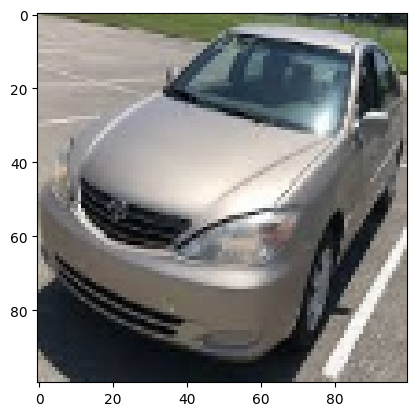

In [ ]:
print(test_labels[100])
print(colors[test_labels[100]])
plt.imshow(test_images[100])

In [ ]:
train_images = train_images.astype(np.float32)
train_labels = train_labels.astype(np.float32)
test_images = test_images.astype(np.float32)
test_labels = test_labels.astype(np.float32)

print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (7267, 100, 100, 3)
Test images shape: (1556, 100, 100, 3)
Train labels shape: (7267,)
Test labels shape: (1556,)


# Section 2

#### Change target_size

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
import tensorflow as tf

model = Sequential()
model.add(Reshape((100, 100, 3)))

model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(.5))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(15))
model.add(Dropout(.5))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


#### Change target_size 2

In [ ]:
model.fit(train_images, train_labels, batch_size=16, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
455/455 [==============================] - 70s 151ms/step - loss: 16.8005 - accuracy: 0.0991 - val_loss: 2.7067 - val_accuracy: 0.1022
Epoch 2/5
455/455 [==============================] - 67s 148ms/step - loss: 2.7192 - accuracy: 0.0857 - val_loss: 2.7048 - val_accuracy: 0.1022
Epoch 3/5
455/455 [==============================] - 65s 144ms/step - loss: 2.7132 - accuracy: 0.0914 - val_loss: 2.7029 - val_accuracy: 0.1022
Epoch 4/5
 74/455 [===>..........................] - ETA: 55s - loss: 2.7058 - accuracy: 0.0878

In [ ]:
from keras.models import load_model

model.save('my_model.h5')

NameError: ignored

#

```
# This is formatted as code
```

 Section **Title**

# CNN Model Training

## Model 1 (40 Epochs, 8 batch_size, etc)


In [ ]:
# thsi is my code

resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)

## Model 2 (1 Epoch, 16 batch_size, etc)

In [ ]:
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)
resized_image = np.expand_dims(resized_image, axis=0)


## Save Model

### Subsub section 1

In [ ]:
import joblib

loaded_model = joblib.load('my_model.h5')

keras_model = load_model(loaded_model)


# model.save("yorha.h5")
# yanka_model = load_model("yorha.h5")
# joblib.dump(yanka_model,"yanka.joblib")